<a href="https://colab.research.google.com/github/sanjeekan/clustering-task/blob/main/Assignment_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EC9630 Machine learning - Assignment 1 \
Task:clustering \
Name:R.Sanjeekan\
Reg No:2020/E/142\
Date:29/07/2024


In [6]:
import pandas as pd

# Load dataset using the 'openpyxl' engine to handle xlsx files
df = pd.read_excel('/content/drive/MyDrive/online+retail/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df_rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
})
df_rfm.columns = ['Recency', 'Frequency', 'Monetary']
df_rfm.reset_index(inplace=True)


In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Data scaling
scaler = StandardScaler()
df_rfm_scaled = scaler.fit_transform(df_rfm[['Recency', 'Frequency', 'Monetary']])

# K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df_rfm['Cluster'] = kmeans.fit_predict(df_rfm_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [12.5, 12.5, 43.75, 43.75],
  [75.0, 75.0, 85.0, 85.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [125.0, 125.0, 135.0, 135.0],
  [102.5, 102.5, 130.0, 130.0],
  [145.0, 145.0, 155.0, 155.0],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [150.0, 150.0, 180.0, 180.0],
  [116.25, 116.25, 165.0, 165.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [235.0, 235.0, 252.5, 252.5],
  [212.5, 212.5, 243.75, 243.75],
  [140.625, 140.625, 228.125, 228.125],
  [80.0, 80.0, 184.375, 184.375],
  [275.0, 275.0, 285.0, 285.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [295.0, 295.0, 312.5, 312.5],
  [280.0, 280.0, 303.75, 303.75],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 33

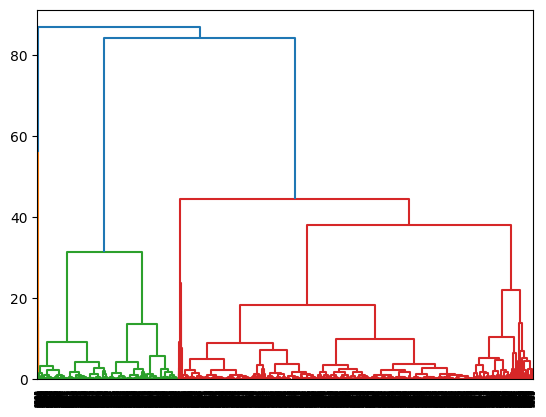

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Hierarchical clustering
linked = linkage(df_rfm_scaled, 'ward')
dendrogram(linked)


In [10]:
from sklearn.cluster import DBSCAN

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_rfm['Cluster_DBSCAN'] = dbscan.fit_predict(df_rfm_scaled)
